In [1]:
%matplotlib inline
from pjr import *
# import xarray as xr

pjr.py complete


ax1 AxesSubplot(0.125,0.125;0.775x0.755)


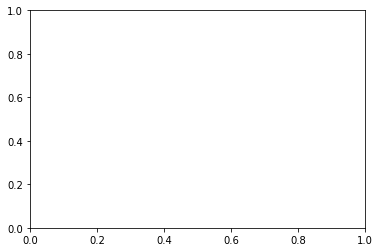

In [2]:
ax1 = plt.gca()
print "ax1", ax1

In [3]:

#clevs = findNiceContours(Txav)
clevs = findNiceContours(np.array([-9, 21.]),rmClev=0.,verbose=1)
print "fNC clevs", clevs

zmin, zmax -9.0 21.0
zinc 3.3333333333333335
pow 0
cints [ 0.1  0.2  0.5  1.   2.   5.  10.  20. ]
nlevsout [300.  150.   60.   30.   15.    6.    3.    1.5]
f1 [291.  141.   51.   21.    6.    3.    6.    7.5]
f2 (array([5]),)
nlevbest, cintsbest 5 5.0
f3 -1.8
ninc, zminout, zmaxout 6 -5.0 20.0
f4 [0.25 0.   0.25 0.5  0.75 1.  ]
alist 1
zlist (array([0, 2, 3, 4, 5]),)
list of nonzero contour levels (array([0, 2, 3, 4, 5]),)
fNC clevs [-5.  5. 10. 15. 20.]


In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc"
g2 = cdms2.open(fname);
varlist = g2.listvariables();
dims = g2.listdimension();
print dims;
print "\n".join(s for s in varlist if 'Z' in s) # find vars that contain 'Z'
#print varlist;

T =  g2('T',squeeze=1)            # extract fields, remove dimensions length one


lat2 = g2['lat']
lon2 = g2['lon']
lev2 = g2['lev']
#print "T.info()", T.info()

Z3 = g2('Z3',squeeze=1)
#print "Z3.info",Z3.info()
print "Z3.range",Z3.min(),Z3.max()


Txav = cdutil.averager(T,axis="x")
print "Txav=", Txav.info()

U =  g2('U',squeeze=1)            # extract fields, remove dimensions length one
Uxav = cdutil.averager(U,axis="x")

# print "LANDFRAC2av=", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")


['chars', 'cosp_ht', 'cosp_htmisr', 'cosp_prs', 'cosp_scol', 'cosp_sr', 'cosp_sza', 'cosp_tau', 'cosp_tau_modis', 'ilev', 'lat', 'lev', 'lon', 'nbnd', 'slat', 'slon', 'time']
BCFREZDEP
ZM_CLUBB
Z3
BCFREZCNT
LINOZ_SZA
LINOZ_SSO3
DSTFREZDEP
LINOZ_DO3_PSC
ZT_CLUBB
DSTFREZCNT
LINOZ_O3CLIM
BCFREZIMM
DSTFREZIMM
LINOZ_O3COL
LINOZ_DO3
Z3.range -7.5360394 64933.23
Txav=*** Description of Slab variable_8 ***
id: variable_8
shape: (72, 192)
filename: 
missing_value: 1e+20
comments: 
grid_name: N/A
grid_type: N/A
time_statistic: 
long_name: Temperature
units: K
tileIndex: None
mdims: [9]
cell_methods: time: mean
No grid present.
** Dimension 1 **
   id: lev
   Designated a level axis.
   units:  hPa
   Length: 72
   First:  0.12382541305561677
   Last:   998.4964394917621
   Other axis attributes:
      realtopology: linear
      positive: down
      formula_terms: a: hyam b: hybm p0: P0 ps: PS
      long_name: hybrid level at midpoints (1000*(A+B))
      standard_name: atmosphere_hybrid_sigma_pre

/Users/d3x345/miniconda2/lib/python2.7/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [6]:
from timeit import default_timer as timer

ps = g2('PS',squeeze=1)
hyam = g2('hyam',squeeze=1)
hybm = g2('hybm',squeeze=1)
eta = hyam+hybm
print "eta", eta
niceeta = findNiceContours(eta*1010.0,20,rmClev=0.)
print "niceeta", niceeta


eta [1.23825413e-04 1.82829236e-04 2.69948862e-04 3.98581704e-04
 5.88509147e-04 8.68938570e-04 1.28299491e-03 1.89435248e-03
 2.79702694e-03 4.12983316e-03 5.96844937e-03 8.37740438e-03
 1.14737872e-02 1.53339382e-02 1.99963380e-02 2.54446965e-02
 3.15932513e-02 3.83662831e-02 4.56711979e-02 5.33095614e-02
 6.10151817e-02 6.84763902e-02 7.53553359e-02 8.19462751e-02
 8.89105431e-02 9.64666734e-02 1.04664967e-01 1.13560001e-01
 1.23210991e-01 1.33682180e-01 1.45043266e-01 1.57369878e-01
 1.70744080e-01 1.85254902e-01 2.00998940e-01 2.18080997e-01
 2.36614787e-01 2.56723686e-01 2.78541558e-01 3.02213640e-01
 3.27897506e-01 3.55764129e-01 3.85999024e-01 4.18803463e-01
 4.54395814e-01 4.92468574e-01 5.31639531e-01 5.70624903e-01
 6.08643774e-01 6.45319968e-01 6.80498044e-01 7.13704638e-01
 7.44474829e-01 7.72362838e-01 7.96952750e-01 8.17868823e-01
 8.35095171e-01 8.49661249e-01 8.63176426e-01 8.76370648e-01
 8.89222736e-01 9.01711833e-01 9.13817504e-01 9.25519748e-01
 9.36798995e-01 9.47

shapes (25,) (25, 30, 10)
testdata shape (25, 30, 10)
range -0.2985332277482142 9.28322619503837
znew (25, 30, 72) 1.967015025041708 8.028575166660396
x
y
z


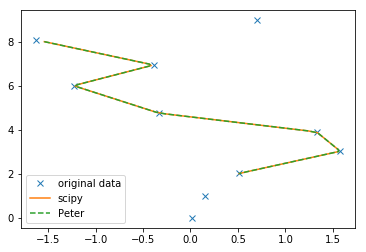

x
y
z


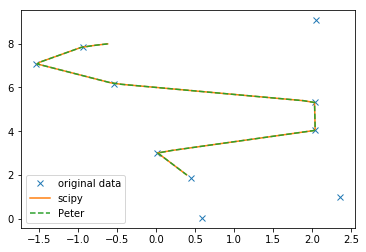

x
y
z


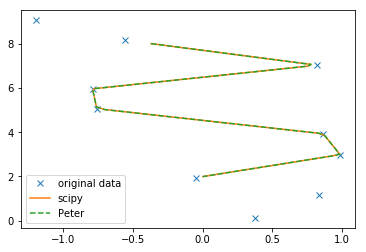

x
y
z


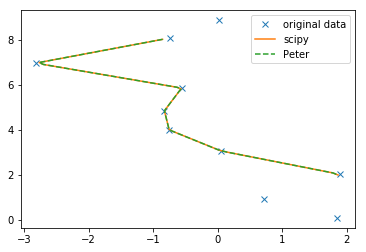

x
y
z


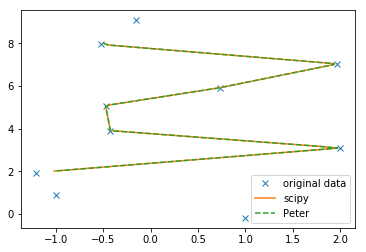

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as scipy1d

# toy coordinates and data
nx, ny, nz = 25, 30, 10
# nx, ny, nz = 288, 192, 25

x = np.arange(nx)
y = np.arange(ny)
z = np.tile(np.arange(nz), (nx,ny,1)) + np.random.randn(nx, ny, nz)*.1
testdata = np.random.randn(nx,ny,nz) # x,y,z
print "shapes", x.shape, z.shape
print "testdata shape", testdata.shape

print "range", z.min(), z.max()

# Desired z-coordinates (must be between bounds of z)
#znew = np.tile(np.linspace(2,nz-2,50), (nx,ny,1)) + np.random.randn(nx, ny, 50)*0.01
znew = np.tile(np.linspace(2,nz-2,72), (nx,ny,1)) + np.random.randn(nx, ny, 72)*0.01
print "znew", znew.shape, znew.min(), znew.max()

# Inverse the coordinates for testing
z = z[..., ::-1]
znew = znew[..., ::-1]

# Now use own routine
ynew = interp_along_axis(testdata, z, znew, axis=2, inverse=True, method='linear')

# Check some random profiles
for i in range(5):
    randx = np.random.randint(nx)
    randy = np.random.randint(ny)
#    print "randx, randy", randx, randy
#    print "z[randx,randy]", z[randx, randy]
#    print "znew[randx, randy]", znew[randx, randy]
    print "x"
    checkfunc = scipy1d(z[randx, randy], testdata[randx,randy], kind='linear')
    checkdata = checkfunc(znew)
    print "y"
    fig, ax = plt.subplots()
    ax.plot(testdata[randx, randy], z[randx, randy], 'x', label='original data')
    ax.plot(checkdata[randx, randy], znew[randx, randy], label='scipy')
    ax.plot(ynew[randx, randy], znew[randx, randy], '--', label='Peter')
    print "z"
    ax.legend()
    plt.show()

In [17]:
from timeit import default_timer as timer
start = timer()
P = cdutil.reconstructPressureFromHybrid (ps,hyam,hybm,1.e5)
P = P/100.
P.units = "hPa"
end = timer()
print "reconstruction time ",(end - start) # Time in seconds, e.g. 5.38091952400282print ps.units, ps.max()

print "P.data", P.data.shape, type(P.data)
#print "col", P.data[:,0,0]
nz, ny, nx = P.data.shape
print "nz, ny, nx", nz, ny, nx
nznew = 50
pcol = np.linspace(100.,1000.,nznew)
nznew = niceeta.shape[0]
pcol = niceeta
#print "pcol", pcol.shape, pcol
pnew = np.repeat(pcol,nx*ny).reshape((nznew,ny,nx)); pold = P.data
pnew = np.log(pnew); pold = np.log(P.data)
#print "pnew",pnew.shape
print "newcol", pnew[:,0,0]
ynew = interp_along_axis(T.data, pold, pnew, axis=0, inverse=False, method='linear')
#print "ynew", ynew.shape
#print "ynew00", ynew[:,0,0]
nlevs = cdms2.createAxis(niceeta)
TP0 = T.pressureRegrid(nlevs)
print "missing val", TP0.missing_value
llist = (TP0 > 0.9*TP0.missing_value) 
TP0.data[:] = ynew
TP0.mask = np.isnan(ynew) | llist
print "yy", TP0.mask[15,74,9]
#print "T", T.info()
#print "P", P.info()
#print "niceeta", niceeta.info()

end = timer()
print "recon+interpolation time ",(end - start) # Time in seconds, e.g. 5.38091952400282print ps.units, ps.max()


reconstruction time  0.36604309082
P.data (72, 192, 288) <type 'numpy.ndarray'>
nz, ny, nx 72 192 288
newcol [3.91202301 4.60517019 5.01063529 5.29831737 5.52146092 5.70378247
 5.85793315 5.99146455 6.10924758 6.2146081  6.30991828 6.39692966
 6.47697236 6.55108034 6.62007321 6.68461173 6.74523635 6.80239476
 6.85646198 6.90775528]
missing val 1e+20
yy False
recon+interpolation time  0.673010110855


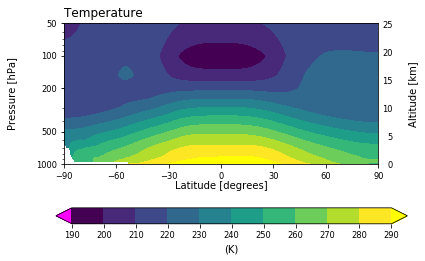

In [18]:

#print "list", list
TP0xav = cdutil.averager(TP0,axis="x")
levsp = TP0xav.getAxis(0)
plotZMf(TP0xav, lat2, levsp)

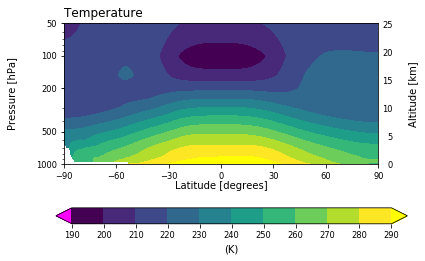

In [12]:
TP2 = cdutil.logLinearInterpolation(T,P,levels=niceeta)
#print "TP2.data00", TP2.data[:,0,0]
#print TP2.info()
TP2xav = cdutil.averager(TP2,axis="x")
levsp = TP2xav.getAxis(0)
plotZMf(TP2xav, lat2, levsp)

range of Dxav 0.0 0.0


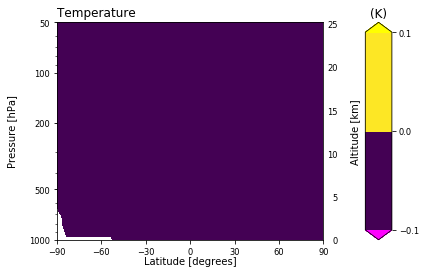

In [19]:
DPxav = TP0xav-TP2xav
print "range of Dxav", DPxav.min(), DPxav.max()
plotOpt={'title':'Temperature','colorbar':'right','units':'(K)','ybot':1000.,'ytop':50.}
# plotOpt={'title':'Temperature','clevs':np.arange(170.,270.,10.)}
#print "plotOpt",plotOpt
plotZMf(DPxav, lat2, levsp, plotOpt=plotOpt)

text goes here
$$
a = \sqrt b^c
$$

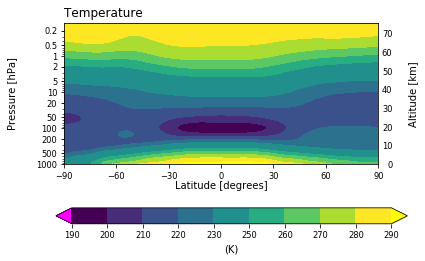

In [20]:
fig = plt.figure()
plt.tight_layout(pad=0.05, w_pad=0.0, h_pad=0.1)
axest = fig.add_subplot(111)
#plotZMf(Txav, lat2, lev2, fig=fig, axesa=axest) # works
#plotZMf(Txav, lat2, lev2, fig=fig) #works
plotZMf(Txav, lat2, lev2, plotOpt={"rmClev":240.,'colorbar':'bot'}) #works

range of Dxav -18.96409303612168 103.33246296875734


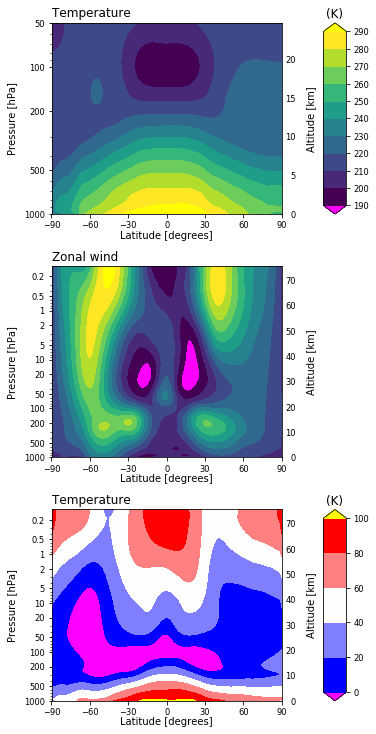

In [21]:

fig = plt.figure(figsize=(5., 10.), facecolor='white')
axest = fig.add_subplot(311)
axesm = fig.add_subplot(312)
axesb = fig.add_subplot(313)
#plotOpt = {'levels':np.arange(170.,330.,10.),'units':'K','title':'Temperature'} #,
#         'ybot':800.,'ytop':500.}
#plotOpt = {}
axesa = axest
Dxav = Txav-Uxav-200
print "range of Dxav", Dxav.min(), Dxav.max()
plotOpt={'title':'Temperature','colorbar':'right','units':'(K)','ybot':1000.,'ytop':50.}
# plotOpt={'title':'Temperature','clevs':np.arange(170.,270.,10.)}
#print "plotOpt",plotOpt
plotZMf(Txav, lat2, lev2, plotOpt=plotOpt, axesa=axest)
#plotZMf(Dxav, lat2, lev2, fig=fig) # works
#plotZMf(Dxav, lat2, lev2, axesa=axesm) # works
#plotZMf(Txav, lat2, lev2, axesa=axest, plotOpt={'title':'Temperature'},fig=fig)
plotZMf(Uxav, lat2, lev2, plotOpt={'colorbar':'rightnd','Units':'K'}, axesa=axesm,fig=fig)
cmap = diverge_map()
plotZMf(Dxav, lat2, lev2, axesa=axesb,fig=fig,plotOpt={'cmap':cmap,'colorbar':'right'})
plt.tight_layout(pad=0, w_pad=0.0, h_pad=1.0)

# show plot
# plt.show()
plt.savefig("test.pdf",type="pdf")

In [ ]:
1./0. # disable cell

import numpy as np
import warnings

# original code from 
# https://stackoverflow.com/questions/28934767/best-way-to-interpolate-a-numpy-ndarray-along-an-axis
def interp_along_axis(y, x, newx, axis, inverse=False, method='linear'):
    """ Interpolate vertical profiles, e.g. of atmospheric variables
    using vectorized numpy operations

    This function assumes that the x-xoordinate increases monotonically

    ps:
    * Updated to work with irregularly spaced x-coordinate.
    * Updated to work with irregularly spaced newx-coordinate
    * Updated to easily inverse the direction of the x-coordinate
    * Updated to fill with nans outside extrapolation range
    * Updated to include a linear interpolation method as well
        (it was initially written for a cubic function)

    Peter Kalverla
    March 2018

    --------------------
    More info:
    Algorithm from: http://www.paulinternet.nl/?page=bicubic
    It approximates y = f(x) = ax^3 + bx^2 + cx + d
    where y may be an ndarray input vector
    Returns f(newx)

    The algorithm uses the derivative f'(x) = 3ax^2 + 2bx + c
    and uses the fact that:
    f(0) = d
    f(1) = a + b + c + d
    f'(0) = c
    f'(1) = 3a + 2b + c

    Rewriting this yields expressions for a, b, c, d:
    a = 2f(0) - 2f(1) + f'(0) + f'(1)
    b = -3f(0) + 3f(1) - 2f'(0) - f'(1)
    c = f'(0)
    d = f(0)

    These can be evaluated at two neighbouring points in x and
    as such constitute the piecewise cubic interpolator.
    """
    # View of x and y with axis as first dimension
    if inverse:
        _x = np.moveaxis(x, axis, 0)[::-1, ...]
        _y = np.moveaxis(y, axis, 0)[::-1, ...]
        _newx = np.moveaxis(newx, axis, 0)[::-1, ...]
    else:
        _y = np.moveaxis(y, axis, 0)
        _x = np.moveaxis(x, axis, 0)
        _newx = np.moveaxis(newx, axis, 0)
    # Sanity checks
    if np.any(_newx[0] < _x[0]) or np.any(_newx[-1] > _x[-1]):
        # raise ValueError('This function cannot extrapolate')
        warnings.warn("Some values are outside the interpolation range. "
                      "These will be filled with NaN")
    if np.any(np.diff(_x, axis=0) < 0):
        raise ValueError('x should increase monotonically')
    if np.any(np.diff(_newx, axis=0) < 0):
        raise ValueError('newx should increase monotonically')
    # Cubic interpolation needs the gradient of y in addition to its values
    if method == 'cubic':
        # For now, simply use a numpy function to get the derivatives
        # This produces the largest memory overhead of the function and
        # could alternatively be done in passing.
        ydx = np.gradient(_y, axis=0, edge_order=2)

    # This will later be concatenated with a dynamic '0th' index
    ind = [i for i in np.indices(_y.shape[1:])]
    # Allocate the output array
    original_dims = _y.shape
    newdims = list(original_dims)
    newdims[0] = len(_newx)
    newy = np.zeros(newdims)

    # set initial bounds
    i_lower = np.zeros(_x.shape[1:], dtype=int)
    i_upper = np.ones(_x.shape[1:], dtype=int)
    x_lower = _x[0, ...]
    x_upper = _x[1, ...]
    for i, xi in enumerate(_newx):
        # Start at the 'bottom' of the array and work upwards
        # This only works if x and newx increase monotonically

        # Update bounds where necessary and possible
        needs_update = (xi > x_upper) & (i_upper+1<len(_x))
        # print x_upper.max(), np.any(needs_update)
        while np.any(needs_update):
            i_lower = np.where(needs_update, i_lower+1, i_lower)
            i_upper = i_lower + 1
#orig            x_lower = _x[[i_lower]+ind]
#orig            x_upper = _x[[i_upper]+ind]
            x_lower = _x[tuple([i_lower]+ind)]
            x_upper = _x[tuple([i_upper]+ind)]
            # Check again
            needs_update = (xi > x_upper) & (i_upper+1<len(_x))
        # Express the position of xi relative to its neighbours
        xj = (xi-x_lower)/(x_upper - x_lower)

        # Determine where there is a valid interpolation range
        within_bounds = (_x[0, ...] < xi) & (xi < _x[-1, ...])
        if method == 'linear':
#orig            f0, f1 = _y[[i_lower]+ind], _y[[i_upper]+ind]
            f0, f1 = _y[tuple([i_lower]+ind)], _y[tuple([i_upper]+ind)]
            a = f1 - f0
            b = f0

            newy[i, ...] = np.where(within_bounds, a*xj+b, np.nan)

        elif method=='cubic':
#orig            f0, f1 = _y[[i_lower]+ind], _y[[i_upper]+ind]
#orig            df0, df1 = ydx[[i_lower]+ind], ydx[[i_upper]+ind]
            f0, f1 = _y[tuple([i_lower]+ind)], _y[tuple([i_upper]+ind)]
            df0, df1 = ydx[tuple([i_lower]+ind)], ydx[tuple([i_upper]+ind)]
            a = 2*f0 - 2*f1 + df0 + df1
            b = -3*f0 + 3*f1 - 2*df0 - df1
            c = df0
            d = f0

            newy[i, ...] = np.where(within_bounds, a*xj**3 + b*xj**2 + c*xj + d, np.nan)

        else:
            raise ValueError("invalid interpolation method"
                             "(choose 'linear' or 'cubic')")
    if inverse:
        newy = newy[::-1, ...]

    return np.moveaxis(newy, 0, axis)